In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [3]:
city_name =  []
lattitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial endpoint URL
endpoint = f"{base_url}appid={weather_api_key}&units={units}&q="

# Looping through cities list

for city in cities:
    try:
        response = requests.get(endpoint + city).json()
        print(f"Processing record of | {city}")
        city_name.append(response['name'])
        lattitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except KeyError:
        print(f"City not found.....skipping")

Processing record of | okato
Processing record of | pisco
Processing record of | klaksvik
Processing record of | katsuura
Processing record of | neuquen
Processing record of | matara
Processing record of | harper
Processing record of | hermanus
Processing record of | tumut
Processing record of | arraial do cabo
Processing record of | broome
Processing record of | marsh harbour
Processing record of | gravdal
Processing record of | rikitea
Processing record of | vaini
Processing record of | saint george
Processing record of | camana
Processing record of | port elizabeth
Processing record of | rafraf
Processing record of | roald
Processing record of | tuktoyaktuk
Processing record of | nikolskoye
Processing record of | khatanga
Processing record of | dalby
Processing record of | edson
Processing record of | jamestown
Processing record of | tasiilaq
Processing record of | hilo
Processing record of | grand river south east
City not found.....skipping
Processing record of | hobyo
Processing 

In [5]:
#Creating dataframe

data = {
    "City": city_name,
    "Lat": lattitude,
    "Lng": longitude,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Windspeed": windspeed,
    "Country": country,
    "Date": date
}

data_df = pd.DataFrame(data)

data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,Okato,-39.2000,173.8833,10.23,91,100,5.15,NZ,1624063337
1,Pisco,-13.7000,-76.2167,18.03,82,0,3.09,PE,1624063338
2,Klaksvík,62.2266,-6.5890,8.51,88,93,6.25,FO,1624063338
3,Katsuura,35.1333,140.3000,21.77,83,100,5.21,JP,1624063338
4,Neuquén,-38.9516,-68.0591,2.94,100,90,1.54,AR,1624063228


In [6]:
#exporting data to .csv file
data_df.to_csv("temperaturedata.csv", index=False, header=True, encoding="utf-8")

In [7]:
#checking the data
data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,19.243847,20.825125,19.768696,69.970435,53.886957,3.400887,1.624063e+09
std,33.412341,91.328753,8.035617,21.414464,41.574450,2.282722,8.617543e+01
min,-54.800000,-175.200000,-5.030000,9.000000,0.000000,0.000000,1.624063e+09
25%,-8.802200,-59.577400,14.010000,59.000000,7.000000,1.540000,1.624063e+09
50%,22.075200,20.583300,20.510000,75.000000,69.000000,3.090000,1.624063e+09
75%,48.089950,107.148800,25.960000,86.000000,100.000000,4.760000,1.624063e+09
max,78.218600,179.316700,44.970000,100.000000,100.000000,11.810000,1.624064e+09


In [8]:
#getting indexes of rows with 100 humidity

humidity_100 = []

for row in range(0,len(data_df)):
    if data_df['Humidity'][row] == 100:
        humidity_100.append(row)

humidity_100

[4, 39, 85, 193, 366, 406, 411, 494, 527]

In [9]:
# dropping all cities with 100 humidity and verifying
clean_city_data = data_df.drop(humidity_100, inplace=False)

clean_city_data.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Windspeed     566
Country       566
Date          566
dtype: int64

In [10]:
data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Windspeed     575
Country       575
Date          575
dtype: int64

In [30]:
clean_city_data["New Time"] = pd.to_datetime(clean_city_data["Date"], unit='s')
clean_city_data['New Date'] = pd.to_datetime(clean_city_data["New Time"]).dt.date
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date,New Time,New Date
0,Okato,-39.2000,173.8833,10.23,91,100,5.15,NZ,1624063337,2021-06-19 00:42:17,2021-06-19
1,Pisco,-13.7000,-76.2167,18.03,82,0,3.09,PE,1624063338,2021-06-19 00:42:18,2021-06-19
2,Klaksvík,62.2266,-6.5890,8.51,88,93,6.25,FO,1624063338,2021-06-19 00:42:18,2021-06-19
3,Katsuura,35.1333,140.3000,21.77,83,100,5.21,JP,1624063338,2021-06-19 00:42:18,2021-06-19
5,Matara,5.9485,80.5353,25.54,90,93,3.74,LK,1624063339,2021-06-19 00:42:19,2021-06-19


In [31]:
clean_city_data["New Date"][0]

datetime.date(2021, 6, 19)

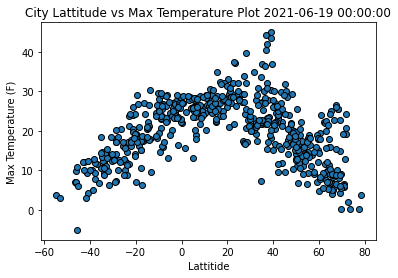

In [32]:
#Lattitude vs Temperature plot

x_axis = clean_city_data["Lat"]
y_axis = clean_city_data['Max Temp']
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")
plt.xlabel("Lattitide")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Lattitude vs Max Temperature Plot {date}")
plt.show()

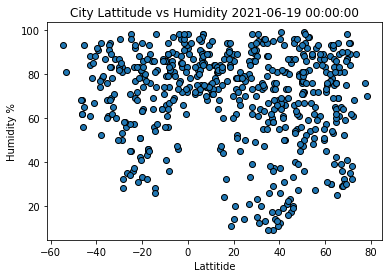

In [33]:
#Lattitude vs Humidity plot

x_axis = clean_city_data["Lat"]
y_axis = clean_city_data['Humidity']
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")
plt.xlabel("Lattitide")
plt.ylabel("Humidity (%)")
plt.title(f"City Lattitude vs Humidity {date}")
plt.show()

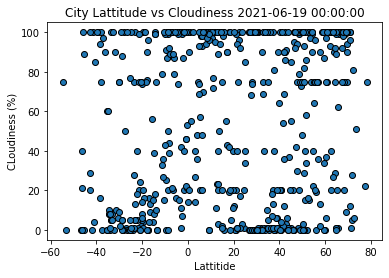

In [34]:
#Lattitude vs Cloudiness plot

x_axis = clean_city_data["Lat"]
y_axis = clean_city_data['Cloudiness']
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")
plt.xlabel("Lattitide")
plt.ylabel("CLoudiness (%)")
plt.title(f"City Lattitude vs Cloudiness {date}")
plt.show()

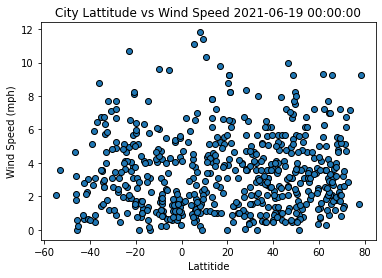

In [35]:
#Lattitude vs Windspeed plot

x_axis = clean_city_data["Lat"]
y_axis = clean_city_data['Windspeed']
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")
plt.xlabel("Lattitide")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Lattitude vs Wind Speed {date}")
plt.show()